<a href="https://colab.research.google.com/github/GUmarEla/feature-_detection/blob/main/03_BlobDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

There is plainty of blob detction algorthims like :


*   Laplacian of Gaussian(LoG)
*   Difference of Gaussians(DoG)
*   Maximally stable extremal regions(MSER)

I only worked on LoG in this

# Import libraries

In [2]:
# Import libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Load image

In [3]:
# Import necessary libraries
import numpy as np
import requests
import cv2

# Define the image URL
url = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR2N9OK2YKfUJp-zElKfTpuBbrUSfn1YFqp7A&s'

# Download the image
response = requests.get(url)
img_data = response.content

# Convert image data to a NumPy array
img_array = np.frombuffer(img_data, np.uint8)

# Decode the images
image = cv2.imdecode(img_array, cv2.IMREAD_COLOR)
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image_color = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# **Blob Detection Algorithms**

## LoG

In [4]:
import numpy as np
from scipy.signal import convolve2d
import cv2

# Define kernels
laplaien_kernel_std = np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]])
laplaien_kernel_dgnl = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])

def gaussian_kernel(kernel_size: int, sigma: float):
    kernel = np.zeros((kernel_size, kernel_size))
    x_center = y_center = kernel_size // 2
    constant = 1 / (2 * np.pi * sigma ** 2)

    for i in range(kernel_size):
        for j in range(kernel_size):
            i_new = i - x_center
            j_new = j - y_center
            distance = i_new ** 2 + j_new ** 2
            kernel[i, j] = constant * np.exp(-distance / (2 * sigma ** 2))

    kernel /= np.sum(kernel)  # Normalize the kernel
    return kernel

def log_kernel(kernel_size: int, sigma: float):
    kernel = np.zeros((kernel_size, kernel_size))
    x_center = y_center = kernel_size // 2

    for i in range(kernel_size):
        for j in range(kernel_size):
            i_new = i - x_center
            j_new = j - y_center
            distance = i_new ** 2 + j_new ** 2
            kernel[i, j] = ((distance - 2 * sigma ** 2) / sigma ** 4) * np.exp(-distance / (2 * sigma ** 2))

    kernel -= kernel.mean()  # Normalize kernel to zero mean
    return kernel

def zero_crossing_detection(image_log):
    zero_crossing = np.zeros_like(image_log)
    for i in range(1, image_log.shape[0] - 1):
        for j in range(1, image_log.shape[1] - 1):
            condition_1 = image_log[i-1, j] * image_log[i+1, j] < 0
            condition_2 = image_log[i, j-1] * image_log[i, j+1] < 0
            if condition_1 or condition_2:
                zero_crossing[i, j] = 255
    return zero_crossing

def LoG(image: np.ndarray, kernel_size: int, sigma: float):
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    image = np.float32(image) / 255.0

    gsn_krnl = gaussian_kernel(kernel_size=kernel_size, sigma=sigma)
    image_smothed = convolve2d(image, gsn_krnl, mode='same', boundary='fill')

    log_krnl = log_kernel(kernel_size=kernel_size, sigma=sigma)
    image_log = convolve2d(image_smothed, log_krnl, mode='same', boundary='fill')

    image_result = zero_crossing_detection(image_log)

    return image_result.astype(np.uint8)


Text(0.5, 1.0, 'LoG for kernel 3 and sigma 5')

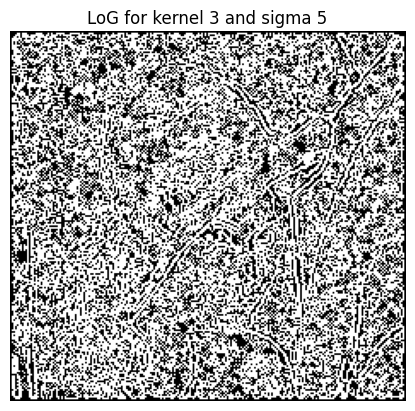

In [18]:
plt.imshow(LoG(image_gray, kernel_size=3, sigma=5), cmap='gray')
plt.axis('off')
plt.title('LoG for kernel 3 and sigma 5')

(-0.5, 231.5, 216.5, -0.5)

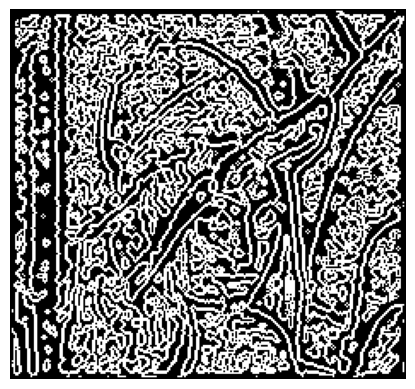

In [13]:
plt.imshow(LoG(image_gray, kernel_size=5, sigma=2.3), cmap='gray')
plt.axis('off')
plt.title('LoG for kernel 5 and sigma 2.3')